In [1]:
import pandas as pd
import datetime
import numpy as np
import math
import matplotlib.pyplot as plt
from datetime import date

In [2]:
today = date.today().strftime("%Y-%m-%d")
# Get today's date as datetime
TDY = pd.Timestamp.today()
TWK = TDY.isocalendar().week
print('Today is :', today, '// Week:', TWK)

Today is : 2024-06-21 // Week: 25


In [3]:
import os
os.getcwd()
os.chdir('C:/Users/tbijoych/OneDrive - purdue.edu/3.Research/Dashboard')

In [4]:
SM = pd.read_excel('./ACRE_0111.xlsx', 'Export')
# df_Soybean=df_Soybean.iloc[1:168, : 26] 

# df_Soybean['Date'] = pd.to_datetime(df_Soybean['Date'])
SM.columns=['Date', 'Sensor1','Sensor2','sensor3','sensor4']
SM=SM.dropna()
SM['Sensor2']=pd.to_numeric(SM['Sensor2'])
SM.head()

,Date,Sensor1,Sensor2,sensor3,sensor4
0,2023-05-01 00:09:58,3276.7,3276.7,0.0,0.0
1,2023-05-01 00:19:55,3276.7,3276.7,0.0,0.0
2,2023-05-01 00:29:58,3276.7,3276.7,0.0,0.0
3,2023-05-01 00:39:55,3276.7,3276.7,0.0,0.0
4,2023-05-01 00:49:55,3276.7,3276.7,0.0,0.0


In [5]:
SM=SM[SM['Sensor1']<3276]
SM=SM[SM['Sensor2']<3276]
df=SM

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' column as index
df.set_index('Date', inplace=True)

# Resample to hourly intervals and aggregate using mean (assuming you want to average Sensor1, Sensor2, Sensor3, Sensor4)
df_hourly = df.resample('H').mean()
df_hourly.head

<bound method NDFrame.head of                        Sensor1    Sensor2    sensor3    sensor4
Date                                                           
2023-05-11 16:00:00  20.550000  27.000000  23.550000  20.100000
2023-05-11 17:00:00  16.600000  33.383333  29.583333  24.116667
2023-05-11 18:00:00  17.683333  31.666667  28.266667  23.233333
2023-05-11 19:00:00  16.483333  34.233333  30.750000  25.016667
2023-05-11 20:00:00  16.400000  34.550000  31.216667  25.333333
...                        ...        ...        ...        ...
2023-09-30 07:00:00  19.900000  29.300000  30.100000  28.000000
2023-09-30 08:00:00  19.850000  29.300000  30.100000  28.000000
2023-09-30 09:00:00  19.800000  29.200000  30.100000  28.000000
2023-09-30 10:00:00  19.800000  29.200000  30.100000  28.000000
2023-09-30 11:00:00  19.900000  29.200000  30.100000  28.000000

[3404 rows x 4 columns]>

In [7]:
# Calculate difference from previous hour for each sensor column
diff_df = df_hourly.diff()

# Reset index to make 'Date' a column again (if needed)
diff_df.reset_index(inplace=True)

In [8]:
filtered_df = diff_df[(diff_df['Date'].dt.hour >= 0) & (diff_df['Date'].dt.hour < 5)]
filtered_df.head(2)

,Date,Sensor1,Sensor2,sensor3,sensor4
8,2023-05-12 00:00:00,-0.02,0.16,0.340000,0.280000
9,2023-05-12 01:00:00,-0.08,0.09,0.236667,0.223333


In [9]:
dat=filtered_df[['Date','sensor4']]
dat=dat[dat['sensor4']>0]
dat

,Date,sensor4
8,2023-05-12 00:00:00,0.280000
9,2023-05-12 01:00:00,0.223333
10,2023-05-12 02:00:00,0.216667
11,2023-05-12 03:00:00,0.216667
12,2023-05-12 04:00:00,0.200000
...,...,...
3204,2023-09-22 04:00:00,0.100000
3251,2023-09-24 03:00:00,0.050000
3252,2023-09-24 04:00:00,0.050000
3297,2023-09-26 01:00:00,0.100000


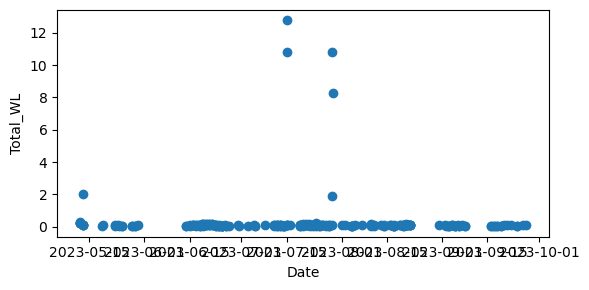

In [10]:
fig, (ax1) = plt.subplots(1, 1, figsize=(6, 3))

# First plot for Total_ET vs Total_ET_ref
ax1.set_xlabel('Date')
ax1.set_ylabel('Total_WL')
ax1.scatter(dat['Date'], dat['sensor4'])
# Adjust layout and show the plot
plt.tight_layout()
plt.show()